# School Finances Dataset

In [17]:
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
import math
import csv
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.mlab as mlab
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('elsec15.csv')

C:\Users\brand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Understanding the Data

In [19]:
df.shape

(14376, 141)

In [20]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [21]:
df.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


What does our Matrix look like?

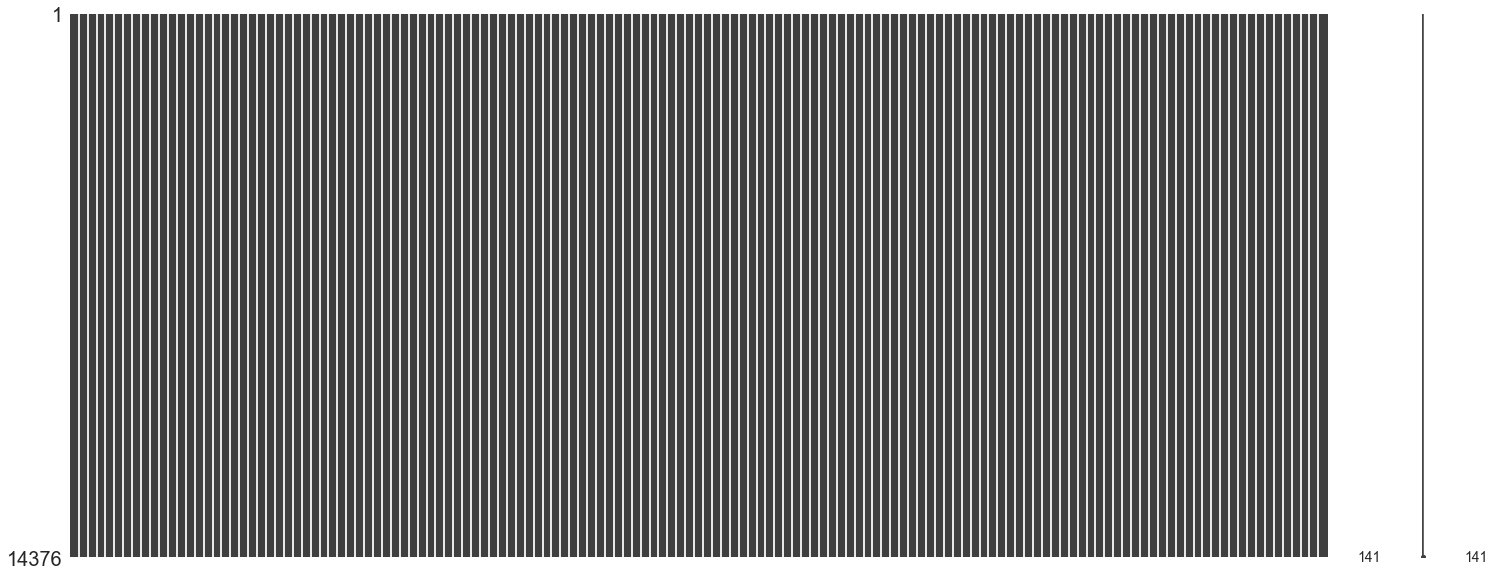

In [22]:
msno.matrix(df)

So all the data is here. However some columns have a lot of 0's. Lets see this

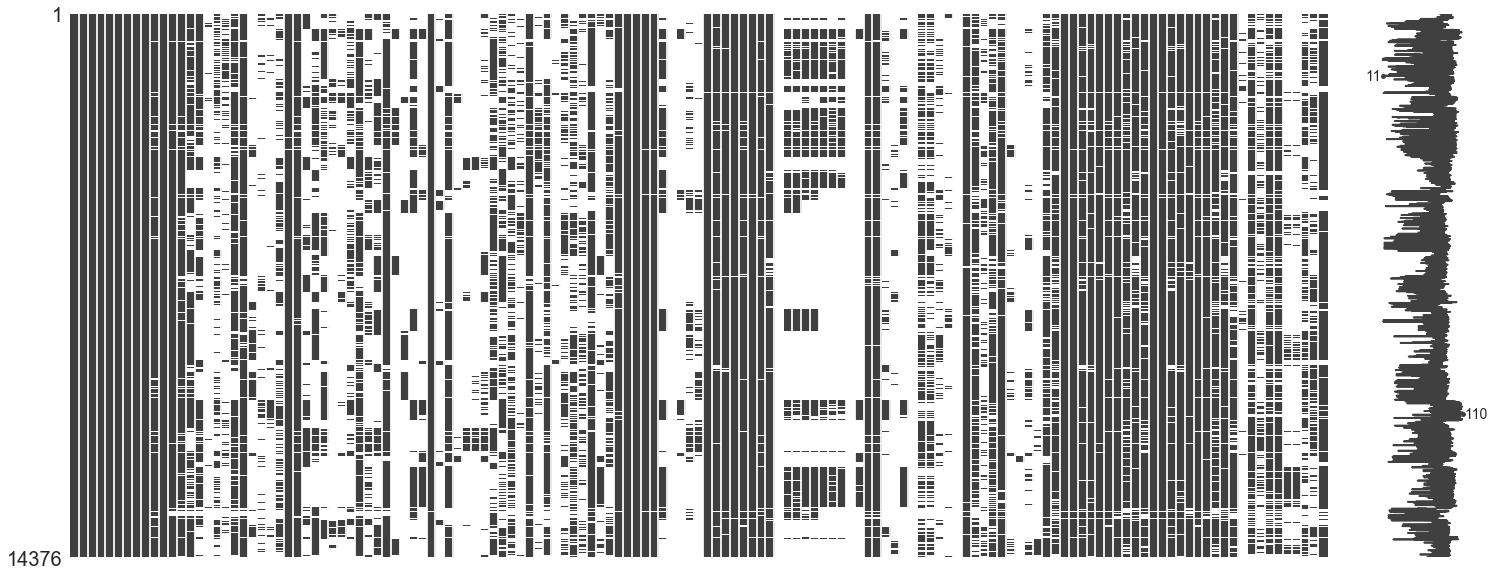

In [23]:
df1 = df.replace(0, float("NAN"))
msno.matrix(df1)

So alot of the data is 0's. Lets see what the data looks like after removing columns have > 50% of their entries as 0's.

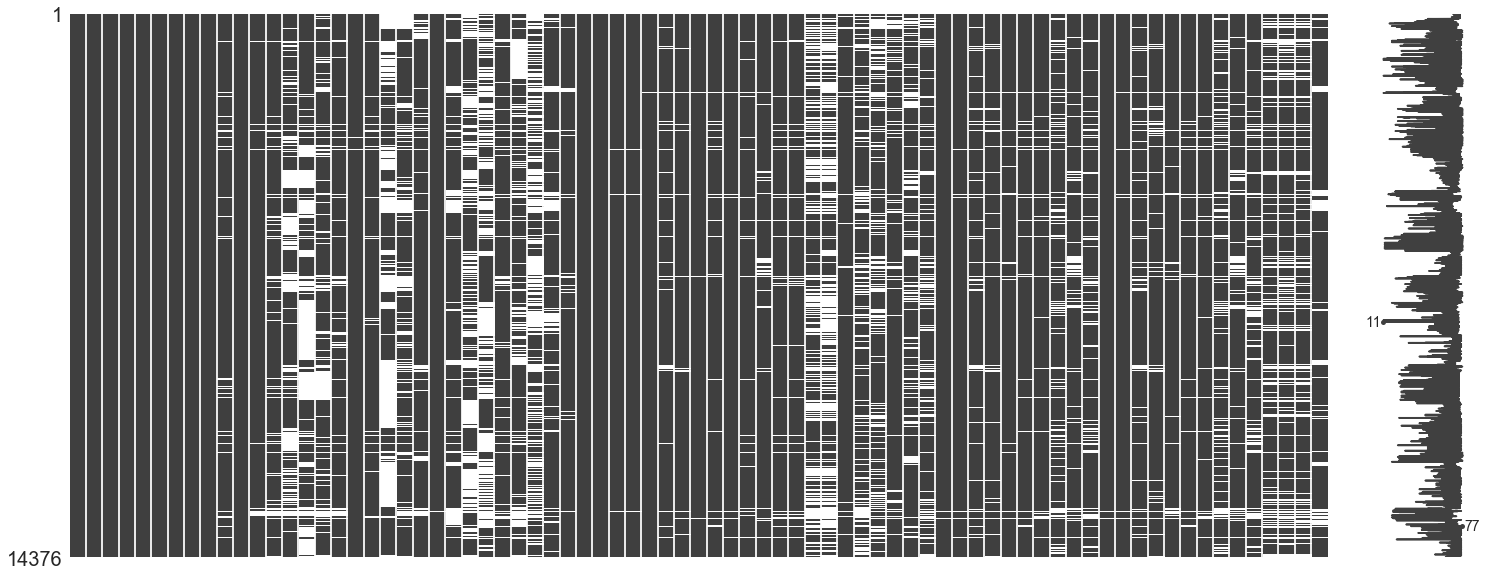

64 columns have more than 50% of their entries as 0's.


In [24]:
df1 = df1.dropna(axis=1,thresh=math.ceil(df.shape[0]/2), how='all')
msno.matrix(df1)
print("%s columns have more than 50%% of their entries as 0's." % str(df.shape[1] - df1.shape[1]))

So about half the columns have > 50% of their entries as zeroes. 

How many rows have > 50% of their entries as zeroes?

In [25]:
df1 = df.replace(0, float("NAN"))
df1 = df1.replace("N", float("NAN"))
df1 = df1.dropna(axis=0,thresh=math.ceil(df1.shape[1]/2), how='all')
print("%s rows have more than 50%% of their entries as 0's." % str(df.shape[0] - df1.shape[0]))

2432 rows have more than 50% of their entries as 0's.


In [26]:
df.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33',
       ...
       'V32', '_19H', '_21F', '_31F', '_41F', '_61V', '_66V', 'W01', 'W31',
       'W61'],
      dtype='object', length=141)

## Cleaning the Data

We have decided to work only with the columns that have > 50 % of the rows as non-zero entries. We thought that if most of the columns are zero, there is not enough discrepancy in the data to make an interesting analysis.

In [27]:
df = df.replace(0, float("NAN"))
df = df.dropna(axis=1,thresh=math.ceil(df.shape[0]/2), how='all')
df = df.replace(float("NAN"), 0)

Additionally some of the data is not very useful to us. For example the census ID's. We have omitted these columns also.

In [28]:
df.drop("YRDATA", axis=1,inplace=True)     #Its all 2015
df.drop("IDCENSUS", axis=1, inplace=True)
df.drop("NCESID", axis=1, inplace=True)

No data is missing, so no data needs to be imputed. We made some mappings between column values and human understandable values, for understanding more of the data.

In [29]:
State_Dict = {1: 'AL', 2: 'AK', 3: 'AZ', 4: 'AR', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DE', 9: 'DC', 10: 'FL', 11: 'GA', 12: 'HA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'IA', 17: 'KS', 18: 'KY', 19: 'LA', 20: 'ME', 21: 'MD', 22: 'MA', 23: 'MI', 24: 'MN', 25: 'MS', 26: 'MO', 27: 'MT', 28: 'NE', 29: 'NV', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NY', 34: 'NC', 35: 'ND', 36: 'OH', 37: 'OK', 38: 'OR', 39: 'PA', 40: 'RI', 41: 'SC', 42: 'SD', 43: 'TN', 44: 'TX', 45: 'UT', 46: 'VT', 47: 'VA', 48: 'WA', 49: 'WV', 50: 'WI', 51: 'WY'}

Col_To_English = {}
with open('School Data Labels.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        Col_To_English[row[0]] = row[1]

for key in Col_To_English:
    print("Code: ", key, "| Label: ",Col_To_English[key])

Code:  STATE | Label:  State Identification Number
Code:  NAME | Label:  School System Name
Code:  CONUM | Label:  ANSI State and County Code
Code:  CBSA | Label:  Core-Based Statistical Area
Code:  SCHLEV | Label:  School Level Code
Code:  V33 | Label:  Fall Membership
Code:  TOTALREV | Label:  TOTAL ELEMENTARY-SECONDARY REVENUE
Code:  TFEDREV | Label:  TOTAL ELEMENTARY-SECONDARY REVENUE
Code:  C14 | Label:  Federal revenue through the state - Title I
Code:  C15 | Label:  Federal revenue through the state - Children with disabilities - IDEA
Code:  C16 | Label:  Federal revenue through the state - Math, science, and teacher quality
Code:  C20 | Label:  Federal revenue through the state - All other
Code:  TSTREV | Label:  Total Revenue from State Sources
Code:  C01 | Label:  General formula assistance
Code:  C10 | Label:  School lunch programs
Code:  C13 | Label:  All other revenues from state sources
Code:  TLOCREV | Label:  Total Revenue from Local Sources
Code:  T06 | Label:  Propert

## Visualizations

First lets look at the geographic distribution of our data

In [30]:
State_Dict = {1: 'AL', 2: 'AK', 3: 'AZ', 4: 'AR', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DE', 9: 'DC', 10: 'FL', 11: 'GA', 12: 'HA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'IA', 17: 'KS', 18: 'KY', 19: 'LA', 20: 'ME', 21: 'MD', 22: 'MA', 23: 'MI', 24: 'MN', 25: 'MS', 26: 'MO', 27: 'MT', 28: 'NE', 29: 'NV', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NY', 34: 'NC', 35: 'ND', 36: 'OH', 37: 'OK', 38: 'OR', 39: 'PA', 40: 'RI', 41: 'SC', 42: 'SD', 43: 'TN', 44: 'TX', 45: 'UT', 46: 'VT', 47: 'VA', 48: 'WA', 49: 'WV', 50: 'WI', 51: 'WY'}
State_Rows = []
for key in State_Dict:
    mask = (df["STATE"] == key)
    States_Values = df[mask]
    count = mask.sum()
    # Corruption is a data value dealt with later
    corruption = (States_Values["V15"].sum() + States_Values["V16"].sum() + States_Values["V17"].sum() + States_Values["V18"].sum()) / (States_Values["Z32"].sum() + States_Values["Z34"].sum())
        
    mydict = {"State": State_Dict[key], "Count": count, "Corruption":corruption}
    State_Rows.append(mydict)
States = pd.DataFrame(State_Rows)

In [ ]:
# GENERATES OUR NUMBER OF SCHOOLS PER STATE CHLOROPLETH
import plotly.plotly as py # Note you need to setup an API key for this to work. 
from plotly.graph_objs import *

scl = [[0.0, 'rgb(252,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = States['State'],
        z = States['Count'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Schools")
        ) ]
layout = Layout(
    autosize=False,
    geo=dict(
        countrycolor='rgb(102, 102, 102)',
        countrywidth=0.1,
        lakecolor='rgb(255, 255, 255)',
        landcolor='rgba(237, 247, 138, 0.28)',
        lonaxis=dict(
            gridwidth=1.5999999999999999,
            range=[-180, -50],
            showgrid=False
        ),
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showland=True,
        showrivers=False,
        showsubunits=True,
        subunitcolor='rgb(102, 102, 102)',
        subunitwidth=0.5
    ),
    hovermode='closest',
    images=list([
        dict(
            x=1,
            y=0.6,
            sizex=0.155,
            sizey=0.4,
            source='http://i.imgur.com/Xe3f1zg.png',
            xanchor='right',
            xref='paper',
            yanchor='bottom',
            yref='paper'
        )
    ]),
    showlegend=True,
    title='<b>Number of Schools per State</b>',
    width= 800,
    margin = dict(
        l=0,
        r=50,
        b=100,
        t=100,
        pad=4)
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='DSD_1')

Now we are going to add a column which converts enrollment size to a categorical data type. Note that the average enrollment size is 693, according to https://nces.ed.gov/pubs2012/2012001.pdf, Page 170.

In [31]:
def group_pop(x): 
    if x >= 50000:
        return "Greater than 50,000"
    elif x < 50000 and x >= 10000:
        return "Greater than 9,999 and less than 50,000"
    elif x < 10000 and x >= 2000:
        return "Greater than 1999 and less than 10,000"
    elif x < 2000 and x >= 999:
        return "Greater than 999 and less than 2000"
    elif x < 1000 and x >= 499:
        return "Greater than 499 and less than 1000"
    elif x < 500 and x >= 99:
        return "Greater than 99 and less than 500"
    else:
        return "Less than 100"
    
df["Enrollment Size Class"] = df['V33'].map(group_pop)
df_pop_mean = df.groupby(df["Enrollment Size Class"]).count()
df_pop_sum = df.groupby(df["Enrollment Size Class"]).sum()
df_pop_count= df.sort_values("V33", ascending=True).groupby(df["Enrollment Size Class"]).count()


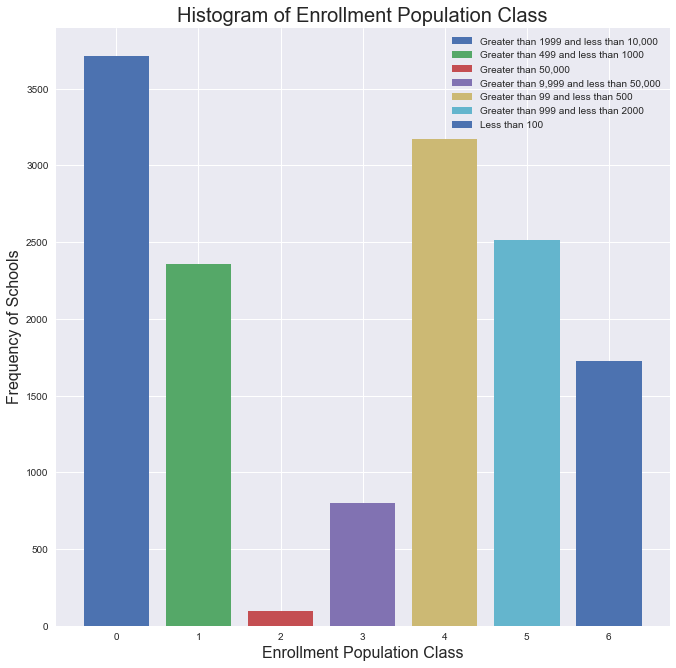

In [32]:
plt.figure(figsize=(11,11))


plt.xlabel('Enrollment Population Class', fontsize=16)
plt.ylabel('Frequency of Schools', fontsize=16)
plt.title('Histogram of Enrollment Population Class', fontsize=20)


for i in range(0,7):
    plt.bar(i, df_pop_count["Enrollment Size Class"][i], label = list(df_pop_sum.index)[i])
plt.legend()
plt.show()
plt.close()

It would be interesting to compare the enrollment population class to the distribution of total revenue for schools in that class, so that is shown in the following Violin Plot

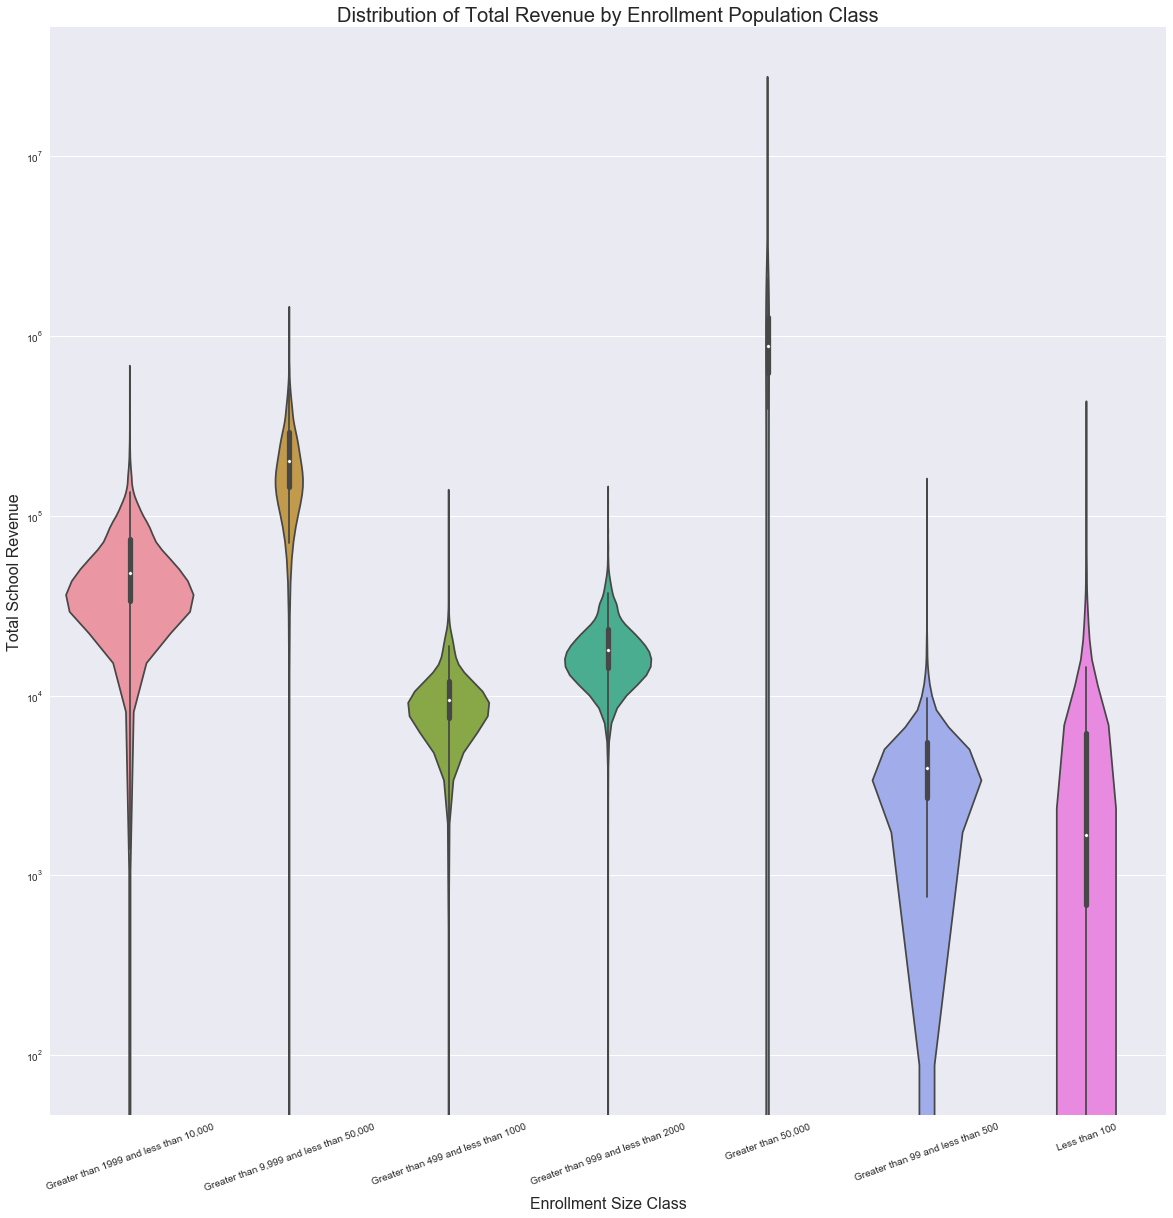

In [33]:
plt.figure(figsize=(20,20))
violinplot = sns.violinplot(x="Enrollment Size Class", y="TOTALREV", data=df,scale="count")
violinplot.axes.set_yscale('log') #Make axis readable
plt.title("Distribution of Total Revenue by Enrollment Population Class", fontsize=20)
plt.xticks(rotation=20)
plt.ylabel('Total School Revenue',fontsize= 16)
plt.xlabel('Enrollment Size Class',fontsize= 16)
plt.show()

Another aspect of the dataset that could be explored is property tax revenue. It might be of interest to see how much property tax revenue schools in our dataset received. Here we see the frequency of schools within particular property tax revenue brackets.

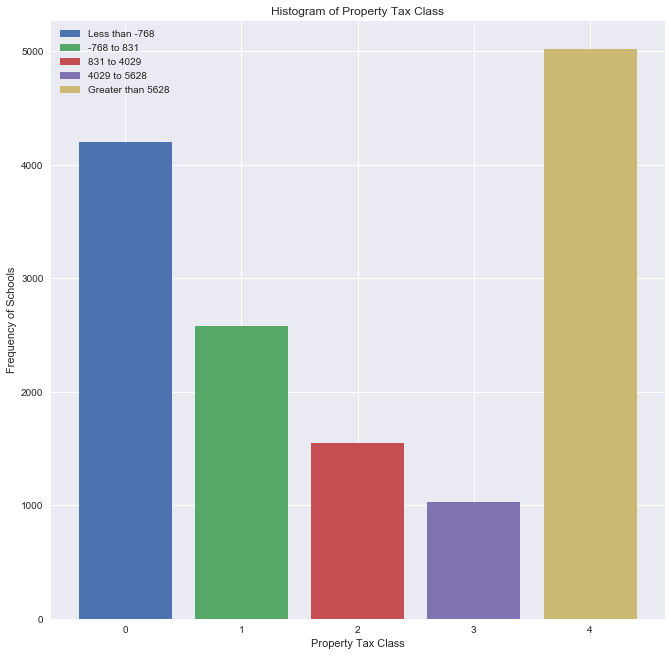

In [64]:
pt_mean = 2430
pt_sd = 1599

property_taxes = df["T06"].dropna()
bin_names = ["Less than " + str(pt_mean - 2*pt_sd), str(pt_mean - 2*pt_sd) + " to " + str(pt_mean - pt_sd), str(pt_mean - pt_sd) + " to " + str(pt_mean + pt_sd), str(pt_mean + pt_sd)+  " to " +  str(pt_mean + 2*pt_sd),  "Greater than " + str(pt_mean + 2*pt_sd) ]
pt_bins = pd.cut(property_taxes, [pt_mean-2*pt_sd, pt_mean-1*pt_sd, pt_mean, pt_mean+1*pt_sd, pt_mean+2*pt_sd, math.inf], labels = bin_names)

pt_taxes = pd.DataFrame(property_taxes.groupby(pt_bins).count())
df["Property Tax Class"] = pt_bins

plt.figure(figsize=(11,11))

plt.xlabel('Property Tax Class')
plt.ylabel('Frequency of Schools')
plt.title('Histogram of Property Tax Class')

for i in range(0,5):
    plt.bar(i, pt_taxes["T06"][i], label = list(pt_taxes.index)[i])
plt.legend()
plt.show()
plt.close()

But perhaps the schools property tax revenue is not realy indicative of very much the school could serve a lot of students or be in richer in poor communities. Perhaps a better aspect to look at is is instructional spending per fall enrollment. Let's create a new column "Instructional spending per student" and get a histogram for that!

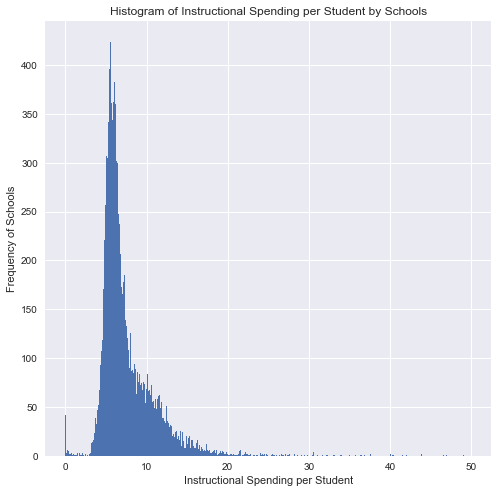

In [67]:
df["Instructional spending per student"] = df["TCURINST"]/df[df["V33"] != 0]['V33']
plt.figure(1, figsize=(8,8))
plt.xlabel('Instructional Spending per Student')
plt.ylabel('Frequency of Schools')
plt.title('Histogram of Instructional Spending per Student by Schools')
df["Instructional spending per student"].hist(range=[0, 50], bins = 500)
plt.show()
plt.close()

# Linear Regression!

That was fun! Now lets perfrom some regression. We'll perform regression using property tax to predict federal revenue for disadvantaged students, instructional spending, and school debt.

We'll build 3 models using simple linear regression

Model 1: Regressing on Property Taxes vs Federal Title 1 Funding (Disadvantaged Students)

Model 2: Regressing on Property Taxes vs Instructional Spending

Model 3: Regressing on Property Taxes vs Outstanding Debt at the start of the fiscal year

But before we train our model, we will remove outliers and zero value data in our property tax columns, as it's believed that they do not add the training of the model.

In [77]:
# Remove outlier property taxes and 0 property taxes. 
df_reg = df.copy()
df_reg = df_reg[(np.abs(stats.zscore(df_reg["T06"])) < 3) & (df_reg["T06"] != 0)]

taxes = df_reg["T06"]
title1 = df_reg["C14"]
spending = df_reg["TCURINST"]
debt = df_reg["_19H"]


Additionaly, let us partition the data into training and validation sets, so we can see check how our models perform.

In [82]:
# Partitioning validation and training data

taxes.shape
train_num = int(np.round(taxes.shape[0]*.8))

taxes_train = taxes[0:train_num]
taxes_valid = taxes[train_num:]
title1_train = title1[0:train_num]
title1_valid = title1[train_num:]
spending_train = spending[0:train_num]
spending_valid = spending[train_num:]
debt_train = debt[0:train_num]
debt_valid = debt[train_num:]

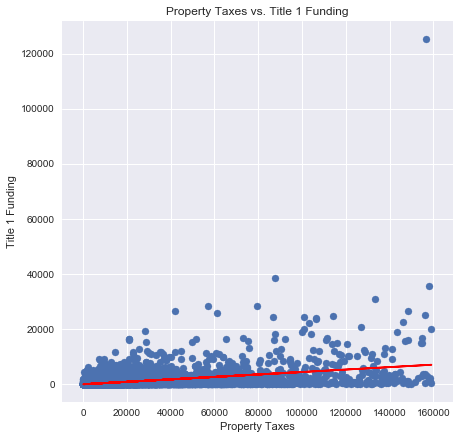

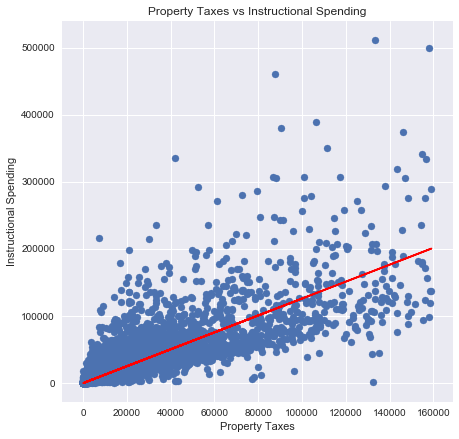

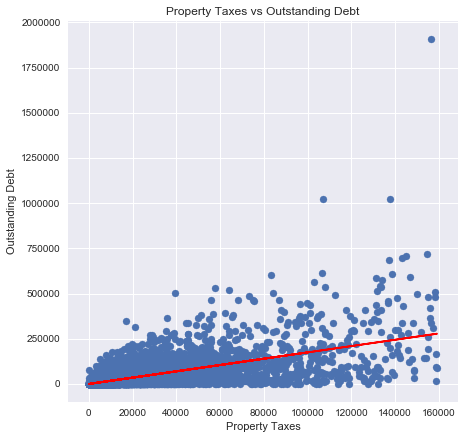

In [83]:
plt.figure(1, figsize=(7,7))
myOLS_title1 = sm.OLS(title1,taxes).fit()
plt.plot(taxes, myOLS_title1.predict(taxes), color = 'red')
plt.scatter(taxes,title1)
plt.title("Property Taxes vs. Title 1 Funding")
plt.xlabel("Property Taxes")
plt.ylabel("Title 1 Funding")
plt.show()
plt.close()

plt.figure(2, figsize=(7,7))
myOLS_spending = sm.OLS(spending,taxes).fit()
plt.plot(taxes, myOLS_spending.predict(taxes), color = 'red')
plt.scatter(taxes,spending)
plt.title("Property Taxes vs Instructional Spending")
plt.xlabel("Property Taxes")
plt.ylabel("Instructional Spending")
plt.show()
plt.close()

plt.figure(3, figsize = (7,7))
myOLS_debt = sm.OLS(debt, taxes).fit()
plt.plot(taxes, myOLS_debt.predict(taxes), color = 'red')
plt.scatter(taxes,debt)
plt.title("Property Taxes vs Outstanding Debt")
plt.xlabel("Property Taxes")
plt.ylabel("Outstanding Debt")
plt.show()
plt.close()

It looks as if property tax revenue best predicts instructional spending! Let's take a better look by calculating the mean sqaured errors.

In [87]:
myOLS = sm.OLS(title1_train,taxes_train).fit()
title1_hat = myOLS.predict(taxes_valid)
title1_mse = 1/len(title1_valid)*np.dot((title1_valid - title1_hat),(title1_valid - title1_hat))
print("The MSE for the model taxes~title1 is:", title1_mse)
myOLS = sm.OLS(spending_train,taxes_train).fit()
spending_hat = myOLS.predict(taxes_valid)
spending_mse = 1/len(spending_valid)*np.dot((spending_valid - spending_hat),(spending_valid - spending_hat))
print("The MSE for the model taxes~spending is:", spending_mse)
myOLS = sm.OLS(debt_train,taxes_train).fit()
debt_hat = myOLS.predict(taxes_valid)
debt_mse = 1/len(debt_valid)*np.dot((debt_valid - debt_hat),(debt_valid - debt_hat))
print("The MSE for the model taxes~debt is:", debt_mse)
# Compare MSE
print(min(title1_mse, spending_mse, debt_mse))

The MSE for the model taxes~title1 is: 2050414.15614
The MSE for the model taxes~spending is: 282908769.491
The MSE for the model taxes~debt is: 2616542250.57


The mean squared error for title 1 and taxes is most minimum, however to best line fit looks best for debt and taxes

# Logistic Regression!

Let's try logistic regression now! Perhaps it'll be intresting to see if property taxes, title 1 funding, funding for disabled students, funding for "math, science" teacher quality, and other forms of federal revenue-- are all predictors of whether a school is in debt or not.

Because logistic regression performs classification towards categorical data, let's create a categorical column debt/no debt.


In [103]:
df["Debt Class"] = df["_19H"] ==  0
print("Percentage of schools with no debt: ", df[df["Debt Class"] == True]["_19H"].count()/df.shape[0])
print("percentage of schools with debt: ", 1 -  df[df["Debt Class"] == True]["_19H"].count()/df.shape[0])

Percentage of schools with no debt:  0.225792988314
percentage of schools with debt:  0.774207011686


In [114]:
#Preprocess columns
taxes = df["T06"]
spending = df["TOTALEXP"]
title1 = df["C14"]
idea = df["C15"]
mstq = df["C16"]
fedrev = df["C20"]
debt = df["Debt Class"]


# Originally no normalization was performed, over flow occured when exponentiating.
# Then a mean normalization was performed, resulting in many negative entries, which caused errors when taking the logarithms.
# Finally, a min-max normalization was tried and worked.

scaler = MinMaxScaler()
categories = [taxes, spending, title1, idea, mstq, fedrev, debt]
scaler.fit(categories)
MinMaxScaler(copy=True, feature_range=(0, 1))

# We'll need to preprocess the columns we want to look at and partition the training and validation set.     
data_x = np.column_stack(scaler.transform(categories))
data_y = np.reshape(debt, (data_x.shape[0], 1))

train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.10, random_state=42)

C:\Users\brand\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


We'll need to burrow the implmentation of the logistic regression given to us in lecture

In [115]:
def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X, w)))

def gradient(X, y, w, onept, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    if onept: 
        return 2 * lamb * w - ((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    return 2 * lamb * w - np.dot(X.T, y - sigmoid(X, w)) / y.size

def loss(X, y, w, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1 - sigmoid(X[i], w))
    return lamb * np.linalg.norm(w)**2 - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X, w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score[0]

Training the model:

In [119]:
weights = np.asarray([np.random.rand() for i in range(train_x.shape[1])]).reshape(train_x.shape[1], 1)
weights /= np.linalg.norm(weights)
losses = []
accuracies = []
epsilon = 0.001
num_iterations = 100

for i in range(100):
    diff = epsilon * gradient(train_x, train_y, weights, False)
    weights = weights - diff
    losses.append(loss(train_x, train_y, weights))
    accuracies.append(accuracy(valid_x, valid_y, weights))

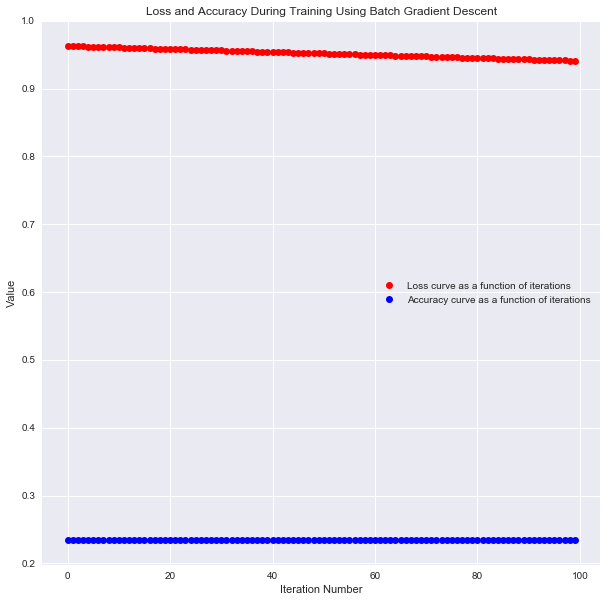

0.234353268428


In [121]:
plt.figure(figsize=[10,10])
loss_line = plt.plot(np.arange(num_iterations), losses, 'ro', label="Loss curve as a function of iterations")
accuracy_line = plt.plot(np.arange(num_iterations), accuracies, 'bo', label = "Accuracy curve as a function of iterations")
plt.legend()
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')

plt.show()
plt.close()
print(accuracy(valid_x, valid_y, weights))